<a href="https://colab.research.google.com/github/AgaWoj/data_science/blob/main/KlasyfikacjaFashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()

In [4]:
tf.__version__

'2.15.0'

## Załadowanie danych i wstępna eksploracja

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243, 202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12, 219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197, 209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99, 244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119, 167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55, 236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,  92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237, 226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,  77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228, 207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244, 159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217, 226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238, 215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200, 159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232, 246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,  80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228, 225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217, 241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224, 229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198, 213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221, 230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219, 221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205, 206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211, 210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177, 210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189, 188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216, 170,   0],
       [  2,   0,   0,   0,  66, 200, 222, 237, 239, 242, 246, 243, 244, 221, 220, 193, 191, 179, 182, 182, 181, 176, 166, 168,  99,  58,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  40,  61,  44,  72,  41,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

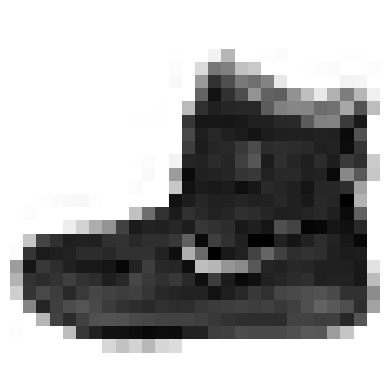

In [9]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

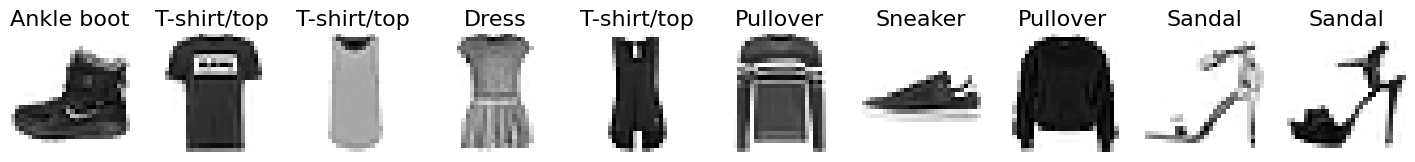

In [10]:
# wyświetlę więcej przykładów z etykietami
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [11]:
# przygotuje dane do modelu, dane muszą być wystandaryzowane

X_train = X_train / 255.
X_test = X_test / 255.

In [12]:
# zmienną która trzyma moje etykiety przekształcam w zmienna kategoryczną

from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test_cut = to_categorical(y_test, num_classes=10)

## Budowa modelu

In [13]:
# jeżeli dane sa różnej wielkości nalezy je wystandaryzować

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))
# 10 bo tyle jest class, 'softmax' - bo klasyfikacja wieloklasowa
model.add(Dense(units=10, activation='softmax'))


# 'categorical_crossentropy' - bo klasyfikacja wieloklasowa
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# na wejsciu 28 x 28 = 784, 784 + 1 x =28 = 100 480 , 128 + 1 x 10 = 1290 => 100480 + 1290 = 101 770

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# trenowanie modelu

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5366 - accuracy: 0.8108 - val_loss: 0.3956 - val_accuracy: 0.8582
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3919 - accuracy: 0.8592 - val_loss: 0.3936 - val_accuracy: 0.8627
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3552 - accuracy: 0.8723 - val_loss: 0.3713 - val_accuracy: 0.8694
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3322 - accuracy: 0.8793 - val_loss: 0.3857 - val_accuracy: 0.8621
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3175 - accuracy: 0.8862 - val_loss: 0.3579 - val_accuracy: 0.8802
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3075 - accuracy: 0.8898 - val_loss: 0.3581 - val_accuracy: 0.8813
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2952 - accuracy: 0.8946 - val_loss: 0.3587 - val_accuracy:

In [15]:
# wyświetlenie wyników w DataFrame
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

# najistotniejsze jest accuracy na zbiorze validacyjnym i funkcja straty na zbiorze validacyjnym - val_loss, val_accuracy
# to są metryki na danych treningowych, na 48 000 próbek

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.536560,0.810771,0.395609,0.858167,0
1,0.391927,0.859167,0.393584,0.862750,1
2,0.355166,0.872333,0.371263,0.869417,2
3,0.332243,0.879333,0.385749,0.862083,3
4,0.317453,0.886208,0.357929,0.880250,4
5,0.307497,0.889750,0.358103,0.881250,5
6,0.295211,0.894604,0.358693,0.883250,6
7,0.289076,0.897146,0.357370,0.882417,7
8,0.278357,0.902833,0.392956,0.874417,8
9,0.271197,0.903625,0.351129,0.888000,9


# Ocena modelu

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [17]:
fig= make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text= 'epoch')
fig.update_yaxes(title_text= 'accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')

fig.show()

In [18]:
# metodą evaluate ocenię model

test_loss, test_acc = model.evaluate(X_test, y_test_cut, verbose=0)
print(test_acc), print(test_loss)


0.8816999793052673
0.3728426396846771


(None, None)

# Predykcja na podstawie modelu

In [19]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 3ms/step


array([[0.000000029813, 0.000000000103, 0.000000001833, ..., 0.0061967876  , 0.0000012969  , 0.99377835    ],
       [0.000000439763, 0.            , 0.9999878     , ..., 0.000000000001, 0.            , 0.000000000001],
       [0.000000047265, 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000000618375, 0.            , 0.000001547238, ..., 0.000001930526, 0.99999565    , 0.000000000062],
       [0.000000002376, 0.9999997     , 0.000000000001, ..., 0.            , 0.            , 0.000000000005],
       [0.000048780304, 0.000003016884, 0.0009858361  , ..., 0.008666887   , 0.00053013756 , 0.000046526697]], dtype=float32)

In [20]:
# predictions do DataFrame wrzucam
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.006197,0.000001,0.993778
1,0.000000,0.000000,0.999988,0.000000,0.000009,0.000000,0.000003,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.194335,0.000000,0.003519,0.000013,0.000193,0.000000,0.801902,0.000000,0.000037,0.000000


In [21]:
# Przewiduje class-y

# y_pred_prob = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred_prob, axis=-1)

predictions_cls = np.argmax(predictions, axis=1)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

## Eksploracja predykcji

In [23]:
# wykres słupkowy prawdopodobieństw poszczególnych class

#@title Wybierz index zdjęcia:
idx = 5592 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
  color='green'
else:
  color='red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', marker_color=color))
fig.update_layout(width=600, height=300, title=f'Predykcja: {class_names[predictions_cls[idx]]}')

fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

In [1]:
# kolor zielony jeżeli class się zgadza, kolor czerwony gdzy predykcja jest błędna
# 7025 model ma problem między dwoma klasami - pullover czy coat?

# Błędnie sklasyfikowane obrazy

In [25]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 229 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)